# Proyecto integrador Python + Pandas

**Objetivo**:

Generar públicos objetivo para las campañas del área de Marketing.

Crear y ejecutar sentencias SQL para generar los públicos objetivos requeridos.

In [1]:
import sqlite3
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# lectura y almacenamiento de nombres de archivos sql y csv en carpeta "datasets" en listas:
os.chdir('datasets')
lista_archivos = os.listdir('.')
lista_archivos_sql_create = [archivo for archivo in lista_archivos if archivo.endswith('.sql') and archivo.startswith('create')]
lista_archivos_csv = [archivo for archivo in lista_archivos if archivo.endswith('.csv')]
os.chdir('..')


### Estructura de Datasets

In [3]:
# Lista de archivos de Datos
print(*lista_archivos_csv, sep= '\n')

ecommerce_customers_dataset.csv
ecommerce_orders_dataset.csv
ecommerce_order_items_dataset.csv
ecommerce_products_dataset.csv
ecommerce_order_payments_dataset.csv


In [4]:
# Carga de Datasets
os.chdir('datasets')
order_items_df = pd.read_csv('ecommerce_order_items_dataset.csv', engine='python')
order_payments_df = pd.read_csv('ecommerce_order_payments_dataset.csv', engine='python')
products_df = pd.read_csv('ecommerce_products_dataset.csv', engine='python')
customers_df = pd.read_csv('ecommerce_customers_dataset.csv', engine='python')
orders_df = pd.read_csv('ecommerce_orders_dataset.csv', engine='python')
os.chdir('..')

In [5]:
print('-----------------------------------------------')
print('-----------------------------------------------')
print('Estructura de order_items_df : ')
print('-------------------------------')
print(order_items_df.info())
print('-----------------------------------------------')
print('-----------------------------------------------')
print('Estructura de order_payments_df : ')
print('-------------------------------')
print(order_payments_df.info())
print('-----------------------------------------------')
print('-----------------------------------------------')
print('Estructura de products_df : ')
print('-------------------------------')
print(products_df.info())
print('-----------------------------------------------')
print('-----------------------------------------------')
print('Estructura de customers_df : ')
print('-------------------------------')
print(customers_df.info())
print('-----------------------------------------------')
print('-----------------------------------------------')
print('Estructura de orders_df : ')
print('-------------------------------')
print(orders_df.info())

-----------------------------------------------
-----------------------------------------------
Estructura de order_items_df : 
-------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB
None
-----------------------------------------------
-----------------------------------------------
Estructura de order_payments_df : 
-------------------------------
<class 'pandas.core.frame.DataFrame'>
Ran

### Actividades con Pandas

In [6]:
# seteo de columnas indices:
order_items_df.set_index(['order_id', 'order_item_id'], inplace=True)
order_payments_df.set_index(['order_id','payment_sequential'], inplace=True)
products_df.set_index('product_id', inplace=True)
customers_df.set_index('customer_id', inplace=True)
orders_df.set_index('order_id', inplace=True)

- Obtener el número total de clientes únicos en el conjunto de datos

In [7]:
cant_clientes_unicos = customers_df['customer_unique_id'].nunique()
print(f'Cantidad de clientes unicos: {cant_clientes_unicos}')

Cantidad de clientes unicos: 96096


Existen 96096 clientes únicos en el dataset.

- Calcular el promedio de valor de pago por pedido

In [13]:
promedio_pago_por_pedido = order_payments_df.groupby('order_id').agg(Promedio_pago=('payment_value', 'mean')).sort_values(by='Promedio_pago', ascending=False)
promedio_pago_por_pedido.head(5)

,Promedio_pago
order_id,
03caa2c082116e1d31e67e9ae3700499,13664.08
736e1922ae60d0d6a89247b851902527,7274.88
0812eb902a67711a1cb742b3cdaa65ae,6929.31
fefacc66af859508bf1a7934eab1e97f,6922.21
f5136e38d1a14a4dbd87dff67da82701,6726.66


La tabla anterior muestra los clientes con los mayores promedios de pagos.

- Determinar la categoría de producto más vendida

In [16]:
# calculo de la cantidad de productos vendidos por categoría
productos_vendidos_df = pd.merge(products_df, order_items_df, on='product_id', how='inner')
categorias_cant_vendida = productos_vendidos_df.groupby('product_category_name')['product_category_name'].count()
categorias_cant_vendida.sort_values(ascending=False)

product_category_name
cama_mesa_banho                  11115
beleza_saude                      9670
esporte_lazer                     8641
moveis_decoracao                  8334
informatica_acessorios            7827
                                 ...  
cds_dvds_musicais                   14
la_cuisine                          14
pc_gamer                             9
fashion_roupa_infanto_juvenil        8
seguros_e_servicos                   2
Name: product_category_name, Length: 73, dtype: int64

In [17]:
max_cant = categorias_cant_vendida.max()
max_categoria = categorias_cant_vendida.idxmax()
print(f'Categoria mas vendida: {max_categoria}')

Categoria mas vendida: cama_mesa_banho


La categoría de productos más vendida es la de "cama_mesa_banho"

- Calcular el número total de pedidos realizados

In [18]:
total_pedidos = len(orders_df)
print(f'Cantidad total de pedidos: {total_pedidos}')

Cantidad total de pedidos: 99441


La candidad de pedidos realizados es de 99441

### Creacion de base de datos y tablas

In [26]:
# Creación de base de datos
conn= sqlite3.connect('commerce.db')
cursor = conn.cursor()

In [27]:
#loop para creacion de tablas desde archivos sql
for archivo_create_table in lista_archivos_sql_create:
  path = os.path.join('datasets', archivo_create_table)

  # agrego a las queries de creacion de tablas "IF NOT EXISTS" para
  # poder correr el código varias veces si fuera necesario
  with open(path, 'r') as query_file:
    create_table_query = query_file.read()

  query_words = create_table_query.split()
  query_words.insert(2, 'IF NOT EXISTS')
  create_table_query = ' '.join(query_words)

# creacion de tablas
  cursor.execute(create_table_query)

In [28]:
# query para obtener los nombres de las tablas creadas
cursor.execute("SELECT name FROM sqlite_master WHERE type='table';")
lista_tablas = cursor.fetchall()
lista_nombre_tablas = [tabla[0] for tabla in lista_tablas]
print(lista_nombre_tablas)

['customers', 'orders', 'order_payments', 'order_items', 'products']


In [29]:
# guardado de dataframes en tablas de la base de datos
order_payments_df.to_sql('order_payments', con=conn, if_exists='append')
order_items_df.to_sql('order_items', con=conn, if_exists='append')
orders_df.to_sql('orders', con=conn, if_exists='append')
customers_df.to_sql('customers', con=conn, if_exists='append')
products_df.to_sql('products', con=conn, if_exists='append')

32951

La estructura de las tablas queda de la siguiente manera:

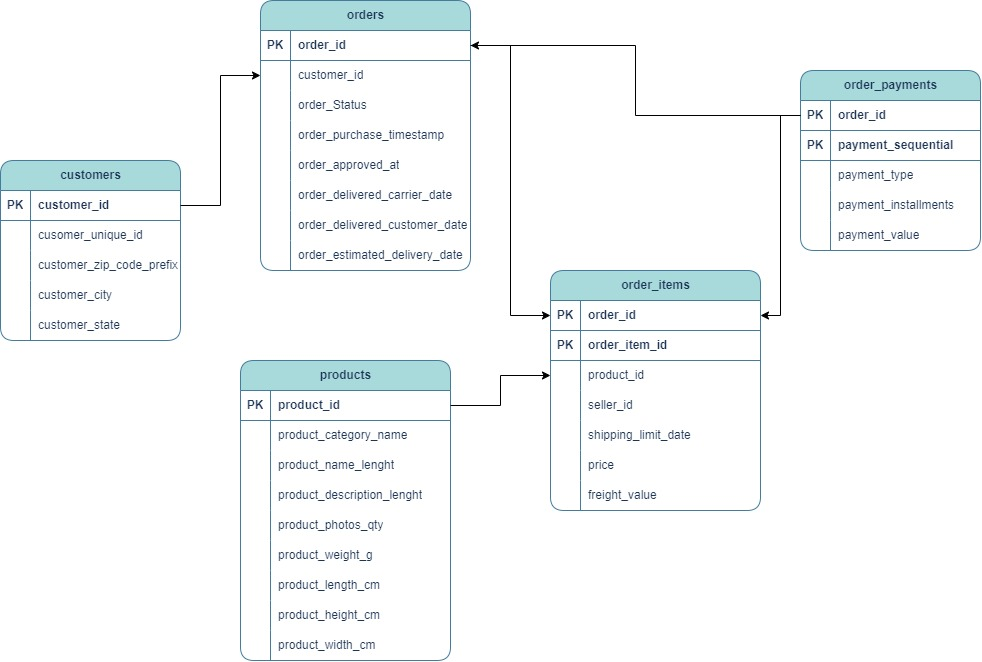

In [30]:
# Consulta PRAGMA para obtener la estructura de las tablas
# y guardado en archivo .info

info_file_1 = 'tablas_estructura.info'

for tabla in lista_nombre_tablas:
  pragma_query = f'PRAGMA table_info({tabla})'
  cursor.execute(pragma_query)
  info_tabla = cursor.fetchall()

  with open(info_file_1, 'a') as f:
    f.write('Tabla: ' + tabla + '\n')
    for info in info_tabla:
      fila_info = 'Columna: ' + info[1] + ' Tipo: ' + info[2] + ('  PK' if info[5] != 0 else '')
      f.write(fila_info + '\n')
    f.write('------------' + '\n')

In [32]:
# Consulta PRAGMA para obtener indices de las tablas
# y guardar en archivo .info

info_file_2 = 'indices_tablas.info'

for tabla in lista_nombre_tablas:
  pragma_query_index = f'PRAGMA index_list({tabla})'
  cursor.execute(pragma_query_index)
  info_index = cursor.fetchall()
  index_name_sql = info_index[0][1] #obtención del string de identificacion del indices de la tabla

  pragma_query_index_info = f'PRAGMA index_info({index_name_sql})'
  cursor.execute(pragma_query_index_info)
  info_index_table = cursor.fetchall()
  indices = [index_name[2] for index_name in info_index_table] # obtención de los nomobres de las columnas indices
  indices_join = ', '.join(indices)

  with open(info_file_2, 'a') as f:
    f.write('Indices tabla ' + tabla + ': ' + '\n')
    f.write(indices_join + '\n')
    f.write('------------' + '\n')

### Consultas SELECT

In [33]:
# creacion de carpeta para almacenar archivos de resultados
folder_resultados = 'resultados'
os.makedirs(folder_resultados, exist_ok=True)

#### Analizar el comportamiento de compra de los clientes

- Utilizar los datos de los **customers**, **orders** y **order_items**.
- Calcula el valor promedio de los pedidos realizados por cada cliente.
- Identifica a los clientes con los pedidos de mayor valor.
- Calcular la frecuencia promedio de compra por cliente,es decir, la cantidad de pedidos realizados en un período de tiempo determinado.
- Generar un informe que muestre los clientes más
frecuentes y su promedio de frecuencia de compra.

##### **Valor promedio de los pedidos realizados por cada cliente**

In [34]:
# Calcula el valor promedio de los pedidos realizados por cada cliente.
query_1 = '''
SELECT c.customer_unique_id AS clientes, AVG(ot.price + ot.freight_value) AS valor_promedio_pedidos
FROM customers AS c
INNER JOIN orders AS o
  ON c.customer_id = o.customer_id
INNER JOIN order_items AS ot
  ON ot.order_id = o.order_id
GROUP BY clientes
ORDER BY valor_promedio_pedidos DESC
;
'''

df_query_1 = pd.read_sql_query(query_1, conn)
file_name_1 = 'query_1.csv'
file_path_1 = os.path.join(folder_resultados, file_name_1)
df_query_1.to_csv(file_path_1)
df_query_1

,clientes,valor_promedio_pedidos
0,dc4802a71eae9be1dd28f5d788ceb526,6929.310000
1,459bef486812aa25204be022145caa62,6922.210000
2,ff4159b92c40ebe40454e3e6a7c35ed6,6726.660000
3,eebb5dda148d3893cdaf5b5ca3040ccb,4764.340000
4,48e1ac109decbb87765a3eade6854098,4681.780000
...,...,...
95415,2878e5b88167faab17d4fb83a986d38b,11.630000
95416,b33336f46234b24a613ad9064d13106d,10.890000
95417,bd06ce0e06ad77a7f681f1a4960a3cc6,10.070000
95418,317cfc692e3f86c45c95697c61c853a6,9.590000


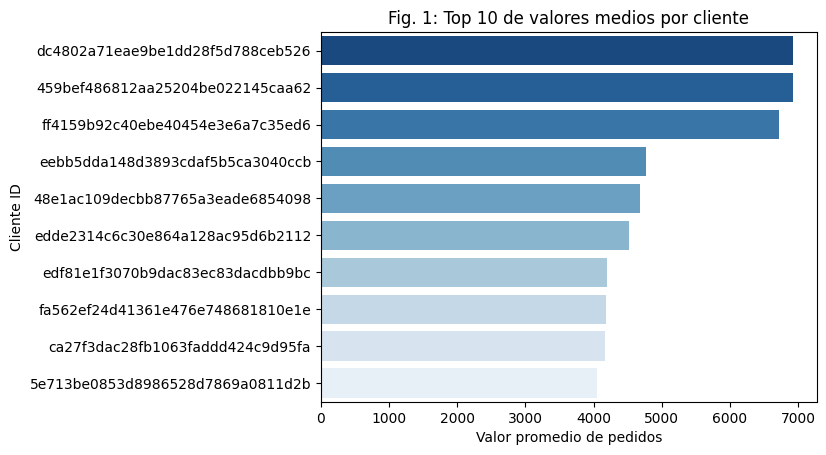

In [35]:
# Visualización de resultados levantando los datos desde la carpeta "resultados":
promedio_pedidos_clientes = pd.read_csv(file_path_1)
promedio_pedidos_clientes = promedio_pedidos_clientes.head(10)

sns.barplot(x ='valor_promedio_pedidos', y='clientes', data=promedio_pedidos_clientes, palette='Blues_r')
plt.xlabel('Valor promedio de pedidos')
plt.ylabel('Cliente ID')
plt.title('Fig. 1: Top 10 de valores medios por cliente')
plt.show()

Para el cálculo del valor promedio de los pedidos realizados por cada cliente se utilizan las tablas **customers**, **order_items** y **orders**.

El valor promedio se obtiene a partir de la suma del precio del producto más el valor de transporte.

En la **Fig. 1** se observan los 10 clientes con el mayor valor promedio en sus pedidos. Existen 3 clientes que en promedio compraron productos por valores cercanos a \$7000, mientras que el resto de los clientes que conforman el top 10 gastaron en promedio entre \$4000 y \$5000.


---

##### **Clientes con los pedidos de mayor valor**

In [36]:
# Identifica a los clientes con los pedidos de mayor valor.
query_2 = '''
SELECT c.customer_unique_id AS clientes, (ot.price + ot.freight_value) AS valor_total_pedido
FROM customers AS c
INNER JOIN orders AS o
  ON c.customer_id = o.customer_id
INNER JOIN order_items AS ot
  ON ot.order_id = o.order_id
GROUP BY clientes
ORDER BY valor_total_pedido DESC
LIMIT 10
;
'''
df_query_2 = pd.read_sql_query(query_2, conn)
file_name_2 = 'query_2.csv'
file_path_2 = os.path.join(folder_resultados, file_name_2)
df_query_2.to_csv(file_path_2)
df_query_2

,clientes,valor_total_pedido
0,dc4802a71eae9be1dd28f5d788ceb526,6929.31
1,459bef486812aa25204be022145caa62,6922.21
2,ff4159b92c40ebe40454e3e6a7c35ed6,6726.66
3,eebb5dda148d3893cdaf5b5ca3040ccb,4764.34
4,48e1ac109decbb87765a3eade6854098,4681.78
5,edde2314c6c30e864a128ac95d6b2112,4513.32
6,edf81e1f3070b9dac83ec83dacdbb9bc,4194.76
7,fa562ef24d41361e476e748681810e1e,4175.26
8,ca27f3dac28fb1063faddd424c9d95fa,4163.51
9,5e713be0853d8986528d7869a0811d2b,4042.74


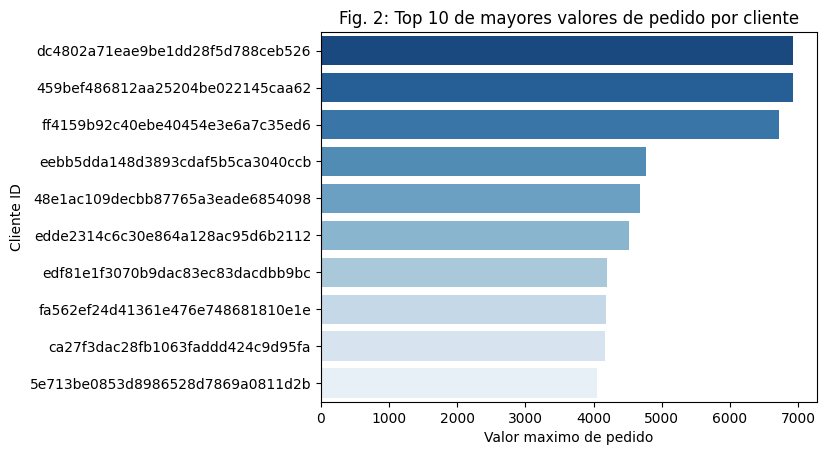

In [37]:
# Visualización de resultados levantando los datos desde la carpeta "resultados":
clientes_pedidos_valor_max = pd.read_csv(file_path_2)

sns.barplot(x ='valor_total_pedido', y='clientes', data=clientes_pedidos_valor_max, palette='Blues_r')
plt.xlabel('Valor maximo de pedido')
plt.ylabel('Cliente ID')
plt.title('Fig. 2: Top 10 de mayores valores de pedido por cliente')
plt.show()

Se utilizan las tablas **customers**, **order_items** y **orders** para obtener los clientes con los pedidos de mayor valor.

La Fig. 2 muestra los 10 clientes con pedidos de mayor valor. Si se comparan estos resultados con la Fig. 1 se observa que los clientes y los valores son los mismos y esto se debe a que estos clientes realizan sólo la compra de un producto, por lo que su promedio (Fig. 1) coincide con su valor.


---

##### Cantidad de pedidos realizados en un período de tiempo determinado

In [39]:
# la cantidad de pedidos realizados en un período de tiempo determinado.
query_3 = '''
SELECT c.customer_unique_id AS clientes, COUNT(order_id) AS cantidad_pedidos
FROM customers AS c
INNER JOIN orders AS o
  ON c.customer_id = o.customer_id
  WHERE o.order_purchase_timestamp BETWEEN '2017-01-01' AND '2017-06-30'
 GROUP BY clientes
 ORDER BY cantidad_pedidos DESC
;
'''
df_query_3 = pd.read_sql_query(query_3, conn)
file_name_3 = 'query_3.csv'
file_path_3 = os.path.join(folder_resultados, file_name_3)
df_query_3.to_csv(file_path_3)
df_query_3

,clientes,cantidad_pedidos
0,12f5d6e1cbf93dafd9dcc19095df0b3d,6
1,a239b8e2fbce33780f1f1912e2ee5275,4
2,83e7958a94bd7f74a9414d8782f87628,4
3,25a560b9a6006157838aab1bdbd68624,4
4,e78838df9c44e102b6ac84cc5eea7d5c,3
...,...,...
14142,0011857aff0e5871ce5eb429f21cdaf5,1
14143,0011805441c0d1b68b48002f1d005526,1
14144,00115fc7123b5310cf6d3a3aa932699e,1
14145,0005e1862207bf6ccc02e4228effd9a0,1




---



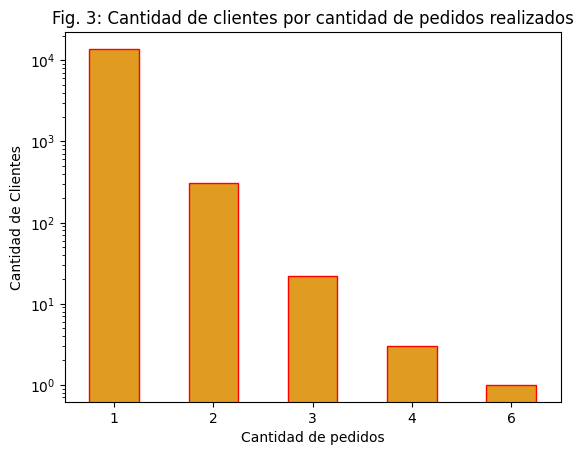

In [45]:
# Visualización de resultados levantando los datos desde la carpeta "resultados":
pedidos_primer_semestre_2017 = pd.read_csv(file_path_3)

cant_clientes_cant_pedidos = pedidos_primer_semestre_2017.groupby('cantidad_pedidos')['clientes'].count().reset_index(name="count")
cant_clientes_cant_pedidos

sns.barplot(x='cantidad_pedidos', y='count', data=cant_clientes_cant_pedidos, width=0.5, color='orange', edgecolor='red')
plt.xlabel('Cantidad de pedidos')
plt.ylabel('Cantidad de Clientes')
plt.yscale("log")
plt.title('Fig. 3: Cantidad de clientes por cantidad de pedidos realizados')
plt.show()


Para obtener la cantidad de pedidos realizados en un período de tiempo determinado considero como periodo el primer semestre del 2017 y utilizo las tablas **customers** y **orders**.

La Fig. 3 hace uso del resultado de la cantidad de pedidos realizados por cliente durante el primer semestre del 2017 para obtener la cantidad de clientes según la cantidad de pedidos realizados. Se observa que en ese periodo de tiempo hay un solo cliente que realizó la máxima cantidad de pedidos, que fue de 6. Por otro lado, la mayoría de los clientes realizan un solo pedido y hay una relación decreciente entre las dos variables.

---

#### Realizar un análisis de popularidad de productos por categoría:
- Utilizar datos de los archivos **products** y **order_items**.
- Agrupar los productos por categoría y calcula la
cantidad total de unidades vendidas para cada
categoría.
- Generar un informe que muestre las categorías de
productos más populares en términos de ventas.

##### Cantidad total de unidades vendidas para cada categoría

In [46]:
# Agrupar los productos por categoría y calcula la
# cantidad total de unidades vendidas para cada categoría.
query_4 ='''
SELECT p.product_category_name AS categoria, COUNT(ot.product_id) AS cantidad_vendido
FROM products AS p
INNER JOIN order_items AS ot
  ON p.product_id = ot.product_id
  WHERE categoria IS NOT NULL
GROUP BY categoria
ORDER BY cantidad_vendido DESC
;
'''
df_query_4 = pd.read_sql_query(query_4, conn)
file_name_4 = 'query_4.csv'
file_path_4 = os.path.join(folder_resultados, file_name_4)
df_query_4.to_csv(file_path_4)
df_query_4

,categoria,cantidad_vendido
0,cama_mesa_banho,11115
1,beleza_saude,9670
2,esporte_lazer,8641
3,moveis_decoracao,8334
4,informatica_acessorios,7827
...,...,...
68,la_cuisine,14
69,cds_dvds_musicais,14
70,pc_gamer,9
71,fashion_roupa_infanto_juvenil,8


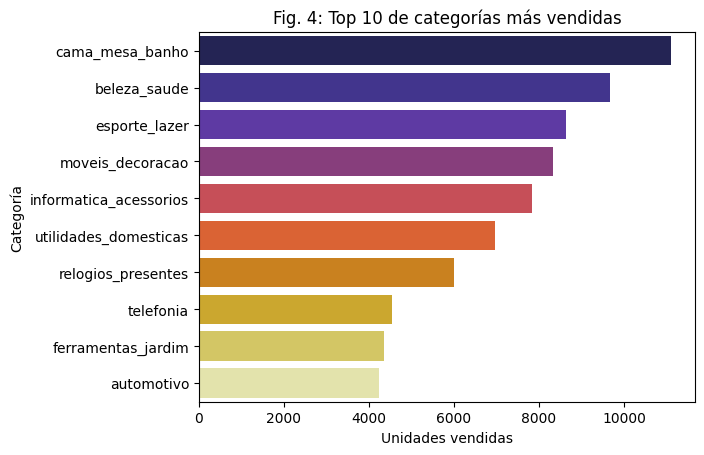

In [47]:
# Visualización de resultados levantando los datos desde la carpeta "resultados":
cantidad_pedidos_categorias = pd.read_csv(file_path_4)
cantidad_categoria = cantidad_pedidos_categorias.head(10)

sns.barplot(x ='cantidad_vendido', y='categoria', data=cantidad_categoria, palette='CMRmap')
plt.xlabel('Unidades vendidas')
plt.ylabel('Categoría')
plt.title('Fig. 4: Top 10 de categorías más vendidas')
plt.show()


Para obtener la cantidad total de unidades vendidas para cada categoría se usan las tablas **order_items** y **products**.

En la Fig. 4 se presenta un top 10 de las cantidades de productos vendidos por categoría.

---

#### Realizar un análisis de la satisfacción del cliente basado en la velocidad de entrega:
- Utiliza datos de los archivos **customers** y **orders**.
- Calcula el tiempo promedio de entrega de los pedidos
por cliente.
- Genera un informe que muestre los clientes con los
tiempos de entrega más rápidos y más lentos.

In [48]:
# Calcula el tiempo promedio de entrega de los pedidos por cliente.
query_5 = '''
SELECT c.customer_unique_id AS clientes, AVG(JULIANDAY(o.order_estimated_delivery_date) - JULIANDAY(o.order_purchase_timestamp)) AS promedio_tiempo_entrega_dias
FROM customers AS c
INNER JOIN orders AS o
  ON c.customer_id == o.customer_id
GROUP BY clientes
ORDER BY promedio_tiempo_entrega_dias ASC
;
'''
df_query_5 = pd.read_sql_query(query_5, conn)
file_name_5 = 'query_5.csv'
file_path_5 = os.path.join(folder_resultados, file_name_5)
df_query_5.to_csv(file_path_5)
df_query_5


,clientes,promedio_tiempo_entrega_dias
0,281096eb031de8c318bba51915fdd16a,1.648993
1,92940a7c21067630362e012337723701,2.010451
2,cbaf7f97e762e8042be7e067c91b4918,2.024074
3,f273a84cae4a2471cd80beb382d673bc,2.026019
4,ec90a3e080dbd0634384ca481ba3d635,2.028287
...,...,...
96091,cb9aa3a6c7716acf0af57d3622616fef,144.358762
96092,3977f83a14549e6265bcded84e92ee80,144.895243
96093,31954fc2c9d7b714d49ee440cc8ab01f,146.249132
96094,85895a0452aba21c4bb0e5b0e1b5e6eb,149.592280


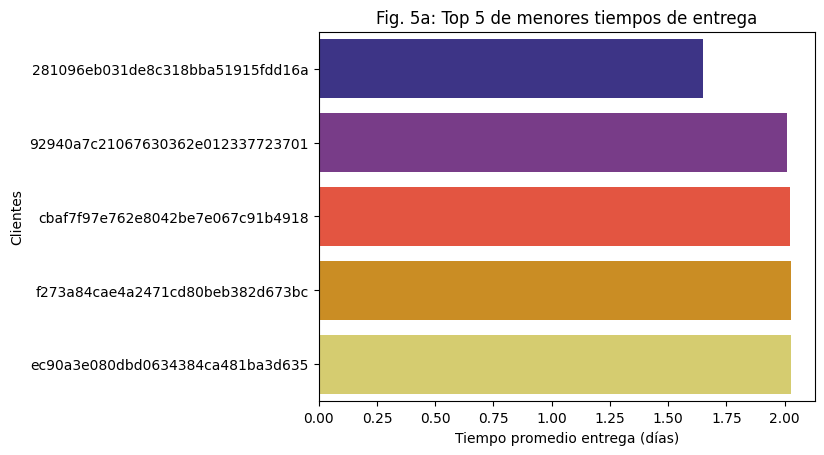

In [57]:
# Visualización de resultados levantando los datos desde la carpeta "resultados":
prom_tiempo_entrega_clientes = pd.read_csv(file_path_5)
prom_tiempo_entrega_clientes_min = prom_tiempo_entrega_clientes.head(5)
prom_tiempo_entrega_clientes_max = prom_tiempo_entrega_clientes.tail(5)

sns.barplot(x ='promedio_tiempo_entrega_dias', y='clientes', data=prom_tiempo_entrega_clientes_min, palette='CMRmap')
plt.xlabel('Tiempo promedio entrega (días)')
plt.ylabel('Clientes')
plt.title('Fig. 5a: Top 5 de menores tiempos de entrega')
plt.show()

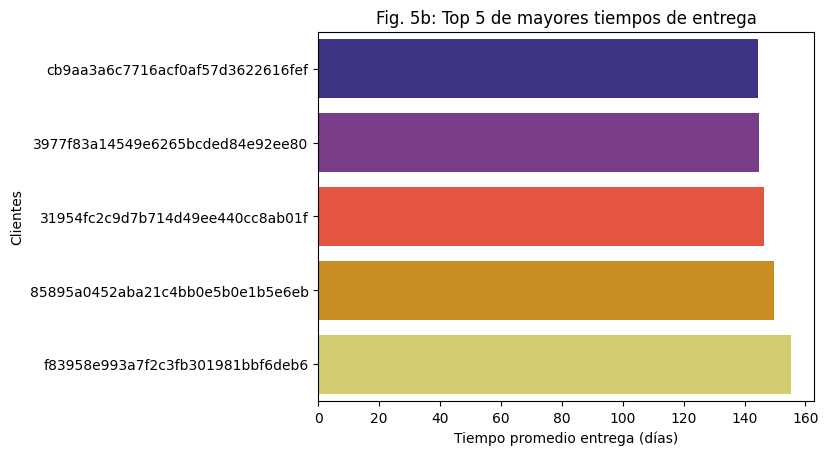

In [58]:
sns.barplot(x ='promedio_tiempo_entrega_dias', y='clientes', data=prom_tiempo_entrega_clientes_max, palette='CMRmap')
plt.xlabel('Tiempo promedio entrega (días)')
plt.ylabel('Clientes')
plt.title('Fig. 5b: Top 5 de mayores tiempos de entrega')
plt.show()

La tablas usadas para el cálculo del tiempo promedio de entrega de los pedidos por cliente fueron **customers** y **orders**.

La Fig. 5a muestra el top 5 de los clientes con los menores tiempos de entrega. El menor tiempo de entrega es menor a dos días. Por otro lado, en la Fig. 5b se visualizan los clientes con los mayores tiempos de entrega, siendo el mayor de todos de aproximadamente 155 días.

---

#### Analizar el rendimiento de los métodos de pago utilizados por los clientes:
- Utilizar datos de los archivos **customers** y **order_payments**.
- Agrupar los pagos por método de pago y calcula el
total de pagos realizados con cada método.
- Generar un informe que muestre los métodos de pago
más utilizados por los clientes.

In [60]:
# Agrupar los pagos por método de pago y calcula el total de pagos realizados con cada método.
query_6 = '''
SELECT payment_type AS metodo_pago, COUNT(payment_type) AS cantidad_pagos
FROM order_payments
GROUP BY metodo_pago
ORDER BY cantidad_pagos DESC
;
'''
df_query_6 = pd.read_sql_query(query_6, conn)
file_name_6 = 'query_6.csv'
file_path_6 = os.path.join(folder_resultados, file_name_6)
df_query_6.to_csv(file_path_6)
df_query_6

,metodo_pago,cantidad_pagos
0,credit_card,76795
1,boleto,19784
2,voucher,5775
3,debit_card,1529
4,not_defined,3


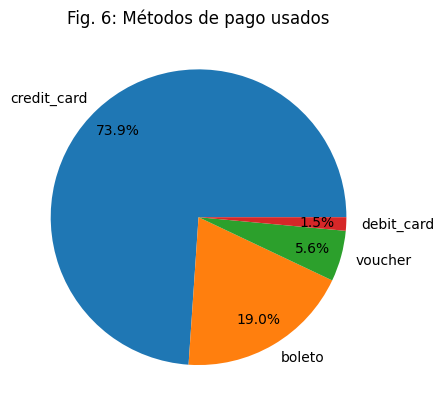

In [68]:
# Visualización de resultados levantando los datos desde la carpeta "resultados":
cantidad_pagos_metodos = pd.read_csv(file_path_6)
cantidad_pagos_metodos = cantidad_pagos_metodos[:-1] # excluyo el metodo de pago not_defined

plt.pie(cantidad_pagos_metodos['cantidad_pagos'], autopct = '%1.1f%%', pctdistance = 0.8, labels = cantidad_pagos_metodos['metodo_pago'], labeldistance=1.1)
plt.title('Fig. 6: Métodos de pago usados')
plt.show()

Se hace uso solamente de la tabla order_payments para calcular el total de pagos por método de pago.

La Fig. 6 indica que el método de pago que predomina es la tarjeta de crédito, representando casi 3/4 de las ventas totales. Luego siguen los métodos boleto, voucher y tarjeta de débito.  

---

### Cierre de conexion a base de datos

In [69]:
cursor.close()
conn.close()